<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>A1: Python Analysis - SF - TEAM_1</h2>
<h4>Business Challenge #2 - BCH-7812 - FMBAN1</h4>
<br>
Professor - Chase Kusterer<br>
Hult International Business School<br>
<h4>Team Members</h4>
<br>
Dennis Otieno
<br>
Rhea Kapoor
<br>
Ofonimo Ben
<br>
Kevin Kabore
<br>
Htet Aung Kyaw

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## <u>Introduction</u>

Advancements in technology and space exploration have made it possible to travel to space, opening up new opportunities for space tourism and colonization (White, 1998). Traveling has benefits for personal growth and well-being, such as increased relaxation and creativity, according to Chen and Petrick (2013) and Vada et al. (2020). Additionally, Maddux et al. (2010) found that travel can boost creativity and productivity. However, travel also comes with potential risks, including accidents, natural disasters, and health concerns like infectious diseases and altitude sickness (Hiranrusme et al., 2020; Pisutsan et al., 2019).<br><br>
In 2912, The Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud while transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars. Although the ship stayed intact, almost half of the passengers were transported to an alternate dimension.

### Objective
This study aims to predict which passengers were transported by the anomaly using records recovered from the spaceship's damaged computer system to help rescue crews and retrieve lost passengers.

### Data Exploration and Analysis

In [1]:
# importing critical libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas                      as pd             # data science essentials
import matplotlib.pyplot           as plt            # essential graphical output
import seaborn                     as sns            # enhanced graphical output
import statsmodels.formula.api     as smf            # regression modeling
import numpy                       as np             # mathematical essentials
import sklearn.linear_model                          # linear modeling in scikit-learn
from sklearn.model_selection import train_test_split # train/test split
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor # gbm
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.metrics import roc_auc_score            #roc_auc_score scoring
from sklearn.metrics import confusion_matrix         #confusion matrix
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting


# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))       

Let's Import and read the datasets from the train and test excel files.

In [2]:
# importing the training dataset
path             = "./"
training_dataset = "train.csv"

# reading in the .csv file with pandas
titanic_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# checking basic info about the dataset
titanic_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
# importing the training dataset
path             = "./"
testing_dataset  = 'test.csv'

# importing the testing dataset
titanic_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

# checking basic info about the dataset
titanic_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<h2>Joining The Data and Handling Missing Values</h2>
<br>
<br>
We join the data so that we can get a good picture of the whole dataset.
<br>
<br>
Looking for the columns that have missing values.

In [4]:
#Setting the colums for joining the two datasets
titanic_train['set'] = 'Training'
titanic_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
titanic_df = titanic_train.append(other = titanic_test)

# resetting index to avoid problems later in the code
titanic_df.reset_index(drop = False,
                       inplace = True)

/var/folders/_x/ngm04q7n3qq5x9kzy_mp26n40000gn/T/ipykernel_69647/1196545245.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = titanic_train.append(other = titanic_test)


In [5]:
titanic_df.isnull().sum()

index              0
PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
set                0
dtype: int64

These missing values were imputed and filled as follows:
- **Home_Planet:** NAs filled with the string "UNKNOWN".
- **Destination:** NAs filled with the string "UNKNOWN".
- **Name:** NAs filled with the string "UNKNOWN".
- **CryoSleep:** Converted into binary columns with values 1 and 0 as CryoSleep_TRUE and CryoSleep_FALSE. The missing values took the form 0 and 0 in each of these columns respectively.
- **VIP:** Converted into binary columns with values 1 and 0 as VIP_TRUE and VIP_FALSE. The missing values took the form 0 and 0 in each of these columns respectively.
- **Cabin:** Takes the form deck/num/side. This was imputed as Unknown/-999/Unknown. The second portion being numeric in nature, a special constant value was used to emphasize that the data was actually missing.
- **FoodCourt, ShoppingMall, Spa, VRDeck, RoomService:** Similar to above, these features being numeric in nature, have been filled in with -999 as a constant value in order to emphasize their original absence.

In [6]:
#filling the missing value in HomePlane with unknown
titanic_df.HomePlanet.fillna("UKNOWN", inplace= True)
#filling the missing value in name with unknown
titanic_df.Name.fillna("UKNOWN", inplace=True)
#filling the missing value in VRDeck with -999
titanic_df.VRDeck.fillna(-999, inplace= True)
#filling the missing value in Spa with -999
titanic_df.Spa.fillna(-999, inplace= True)
#filling the missing value in ShoppingMall with -999
titanic_df.ShoppingMall.fillna(-999, inplace=True)
#filling the missing value in FoodCourt with -999
titanic_df.FoodCourt.fillna(-999, inplace=True)
#filling the missing value in RoomService with -999
titanic_df.RoomService.fillna(-999, inplace=True)
#filling the missing value in Age with average 28
titanic_df.Age.fillna(28, inplace=True)
#filling the missing value in cabin with unknown/2000/2000
titanic_df.Cabin.fillna(f"UKNOWN/{2000}/UNKNOWN", inplace= True)
#creating new binary column for Cryosleep_true
titanic_df["CryoSleep_TRUE"] = 0
#creating new binary column for Cryosleep_false
titanic_df["CryoSleep_False"] = 0
#creating new binary column for vip_true
titanic_df["VIP_TRUE"] = 0
#creating new binary column for vip_true
titanic_df["VIP_FALSE"] = 0
# creating new columns
titanic_df["Surname"] = titanic_df["Name"].copy()
titanic_df["GroupId"] = titanic_df['PassengerId'].copy()
titanic_df["MemberId"] = titanic_df["PassengerId"].copy()
#for loop to look for all the data considering our condition
for index, values in titanic_df.iterrows():
    #condition for creating a binary column cryosleep true
    if titanic_df.loc[index,"CryoSleep"] == True:
        titanic_df.loc[index,'CryoSleep_TRUE'] = 1
    #condition for creating a binary column cryosleep false    
    if titanic_df.loc[index,"CryoSleep"] == False:
        titanic_df.loc[index,'CryoSleep_False'] = 1
    #condition for creating a binary column vip true    
    if titanic_df.loc[index, "VIP"] == True:
        titanic_df.loc[index, 'VIP_TRUE'] = 1
    #condition for creating a binary column vip true    
    if titanic_df.loc[index, "VIP"] == False:
        titanic_df.loc[index, 'VIP_FALSE'] = 1    

<h2>Feature Engineering</h2>
<br>
<br>
The Home Planet feature is being split into three separate boolean variables for Earth, Europa, and Mars. If a passenger is from Earth, then the Earth variable will be set to 1 and the Mars and Europa variables will be set to 0. If a passenger is from Europa or Mars, then their respective variables will be set to 1 and the Earth variable will be set to 0.
<br>
<br>
The CyroSleep variable is being transformed into a binary variable where it takes the value 1 if the passenger was sleeping during the trip and 0 if the passenger was awake. 
<br>
<br>
The Cabin feature contains multiple pieces of information in the form of deck/num/side. To simplify the feature, the decision was made to store each piece of information in a separate feature. The Deck information is being split into eight different features, each corresponding to a different deck: 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'. If a passenger was residing in a particular deck, then the corresponding feature for that deck will be set to 1, and all other deck features will be set to 0.
<br>
<br>
The Home_Planet to Destination features (Earth_To_Cancries, Earth_To_TRAPPIST, Earth_To_PSO, Mars_To_TRAPPIST, Mars_To_Cancries, Mars_To_PSO, Europa_To_TRAPPIST, Europa_To_PSO, Europa_To_Cancries ) is a combination of two separate features that show where the passenger comes from (Home_Planet) and where they are going (Destination). The feature is set to 1 if the passenger if traveling from is Home planet to the right destination.
<br>
<br>
For the Destination feature, the decision was made to create a binary column for each destination that will be set to 1 if the passenger is traveling in that direction.
<br>
<br>
Transformed the VIP column into two variables, VIP_True and VIP_False. VIP_True takes the value 1 if the passenger is a VIP, and 0 otherwise. Similarly, VIP_False takes the value 1 if the passenger is not a VIP, and 0 otherwise.
<br>
<br>
To create the Not_Alone feature that identifies passengers who are traveling in groups, the passenger_id column was used, which contains the number of people within each group. And when that number was above 1 that passenger was classified as Not_Alone. 
<br>
<br>
The Total Spending feature is the sum of each spending on luxury amenities: RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck. The Wealth_Person feature is built based on the average Total Spending value. Any passenger whose Total Spending value is above the average is considered wealthy.
<br>
<br>
It was observed that the RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck features contained many 0 values, which may represent the fact that the passenger did not purchase these services. Therefore, new binary features were created, including With_RoomService, With_FoodCourt, With_Spa, With_VRDeck, and With_ShoppingMall, which take the value 1 if the passenger spent any amount on the corresponding service and 0 otherwise.
<br>
<br>
The age category was divided into four different categories. Children include every passenger below 13 years old, Youth includes every passenger from 13 to 35 years old, Adults include every passenger from 35 to 65 years old, and Seniors includes every passenger above 65 years old.
<br>
<br>
The Same_Surname feature is binary and is built using passengers who share a similar last name to group people who might be part of the same family. It is set to 1 when the last name of the passenger matches with one or more passengers.
<br>
<br>
Cabin_headcount gives us the average number of people in each cabin who travel with More_than_one_pax, which is a binary feature that shows when a cabin has more than an average of 2 people in it.

In [7]:
#creating binary for the column transported
titanic_df["Transported_New"] = 0
#creating binary for the Home Planet
titanic_df["Earth"] = 0
titanic_df["Europa"] = 0
titanic_df["Mars"] = 0
#creating binary for the Destination column
titanic_df["TRAPPIST"] = 0
titanic_df["Cancri"] = 0
titanic_df["PSO"] = 0
#creating the new columns from the split column cabin
titanic_df["Deck"] = titanic_df['Cabin'].copy()
titanic_df.Deck.fillna(f"UKNOWN/{2000}/UNKNOWN", inplace= True)
titanic_df["Num"] = titanic_df['Cabin'].copy()
titanic_df.Num.fillna(f"UKNOWN/{2000}/UNKNOWN", inplace= True)
titanic_df["Side"] = titanic_df['Cabin'].copy()
titanic_df.Side.fillna(f"UKNOWN/{2000}/UNKNOWN", inplace= True)
#creating another column total lux spending for all the continuous variables
titanic_df['Total_Lux_Spending'] = titanic_df['RoomService'] + titanic_df['FoodCourt'] + titanic_df['ShoppingMall'] + titanic_df['Spa'] + titanic_df['VRDeck']
#creating binary columns for the continuous variables to cater for the zeros
titanic_df["With_Family"] = 0
titanic_df["With_RoomService"] = 0
titanic_df["With_FoodCourt"] = 0
titanic_df["With_Spa"] = 0
titanic_df["With_VRDeck"] = 0
titanic_df["With_ShoppingMall"] = 0
# creating new columns for the age brackets
titanic_df['Teenagers'] = 0
titanic_df['Youth'] = 0
titanic_df['Adults'] = 0
titanic_df['Seniors'] = 0
titanic_df['Children'] = 0
#creating new columns for passengers from a home planet to specific destination
titanic_df["Earth_To_TRAPPIST"] = 0
titanic_df["Earth_To_Cancrie"] = 0
titanic_df["Earth_To_PSO"] = 0
titanic_df["Europa_To_TRAPPIST"] = 0
titanic_df["Europa_To_Cancrie"] = 0
titanic_df["Europa_To_PSO"] = 0
#creating new columns for passengers from a home planet to specific destination
titanic_df["Mars_To_TRAPPIST"] = 0
titanic_df["Mars_To_Cancrie"] = 0
titanic_df["Mars_To_PSO"] = 0
#passengers who have family 
titanic_df["Not_Alone"] = 0
#creating a column for wealthy person
titanic_df["Wealthy_Person"] = 0
#creating a new column for passengers with the same surname
titanic_df["Same_Surname"] = 0
#passengers per cabin 
titanic_df["Cabin_Headcount"] = 0
#passengers from earth and mars as humans and non_humans
titanic_df["Earth_and_Mars"] = 0
titanic_df["More_than_one_pax"] = 0
#accounting for ever deck in the ship
titanic_df["Deck_A"] = 0
titanic_df["Deck_B"] = 0
titanic_df["Deck_C"] = 0
titanic_df["Deck_D"] = 0
titanic_df["Deck_E"] = 0
#accounting for every deck in the ship
titanic_df["Deck_F"] = 0
titanic_df["Deck_G"] = 0
titanic_df["Deck_T"] = 0
#accounting for every side in the ship
titanic_df["Side_P"] = 0
titanic_df["Side_S"] = 0
for index, values in titanic_df.iterrows():
    #condition for creating binary for the column transported
    if titanic_df.loc[index,"Transported"] == True:
        titanic_df.loc[index,"Transported_New"] = 1
    if titanic_df.loc[index,"Transported"] == False:
        titanic_df.loc[index,"Transported_New"] = 0
    #condition for creating binary for the Home Planet    
    if titanic_df.loc[index,"HomePlanet"] == "Earth":
         titanic_df.loc[index,"Earth"] = 1
    if titanic_df.loc[index,"HomePlanet"] == "Europa":
         titanic_df.loc[index,"Europa"] = 1
    if titanic_df.loc[index,"HomePlanet"] == "Mars":
         titanic_df.loc[index,"Mars"] = 1
    #condition for creating binary for the Destination column        
    if titanic_df.loc[index,"Destination"] == "TRAPPIST-1e":
        titanic_df.loc[index,"TRAPPIST"] = 1
    if titanic_df.loc[index,"Destination"] == "55 Cancri e":
        titanic_df.loc[index,"Cancri"] = 1
    if titanic_df.loc[index,"Destination"] == "PSO J318.5-22":
        titanic_df.loc[index,"PSO"] = 1 
    #creating the new columns from the split column cabin    
    titanic_df.loc[index,"Deck"] = titanic_df.loc[index,"Deck"].split(f"/")[0]
    titanic_df.loc[index,"Num"] = titanic_df.loc[index,"Num"].split(f"/")[1]
    titanic_df.loc[index,"Side"] = titanic_df.loc[index,"Side"].split(f"/")[2] 
    
    #creating binary columns for the continuous variables to cater for the zeros
    if titanic_df.loc[index,"RoomService"] != 0 :
        titanic_df.loc[index, "With_RoomService"] = 1

    if titanic_df.loc[index,"FoodCourt"] != 0 :
        titanic_df.loc[index, "With_FoodCourt"] = 1

    if titanic_df.loc[index,"Spa"] != 0 :
        titanic_df.loc[index, "With_Spa"] = 1
    #creating binary columns for the continuous variables to cater for the zeros
    if titanic_df.loc[index,"VRDeck"] != 0 :
        titanic_df.loc[index, "With_VRDeck"] = 1

    if titanic_df.loc[index,"ShoppingMall"] != 0 :
        titanic_df.loc[index, "With_ShoppingMall"] = 1
     
    # creating new columns for the age brackets
    if titanic_df.loc[index, 'Age'] < 13:
        titanic_df.loc[index, 'Children'] = 1   
    
    elif titanic_df.loc[index, 'Age'] >= 13 and titanic_df.loc[index, 'Age'] < 20:
        titanic_df.loc[index, 'Teenagers'] = 1 

    elif titanic_df.loc[index, 'Age'] >= 20 and titanic_df.loc[index, 'Age'] < 35:
        titanic_df.loc[index, 'Youth'] = 1 
    # creating new columns for the age brackets
    elif titanic_df.loc[index, 'Age'] >= 35 and titanic_df.loc[index, 'Age'] < 60:
        titanic_df.loc[index, 'Adults'] = 1

    elif titanic_df.loc[index, 'Age'] >= 60:
        titanic_df.loc[index, 'Seniors'] = 1
      
    try:
        titanic_df.loc[index,"Name"] = titanic_df.loc[index,"Name"].split(" ")[0]
        titanic_df.loc[index,"Surname"] = titanic_df.loc[index,"Surname"].split(" ")[1]
    except:
        titanic_df.loc[index,"Name"] = titanic_df.loc[index,"Name"]
        titanic_df.loc[index,"Surname"] = titanic_df.loc[index,"Surname"]
    #accounting for ever deck in the ship
    if titanic_df.loc[index,"Deck"] == "A":
        titanic_df.loc[index, "Deck_A"] = 1
    elif titanic_df.loc[index,"Deck"] == "B":
        titanic_df.loc[index, "Deck_B"] = 1
    elif titanic_df.loc[index,"Deck"] == "C":
        titanic_df.loc[index, "Deck_C"] = 1
    #accounting for ever deck in the ship    
    elif titanic_df.loc[index,"Deck"] == "D":
        titanic_df.loc[index, "Deck_D"] = 1
    elif titanic_df.loc[index,"Deck"] == "E":
        titanic_df.loc[index, "Deck_E"] = 1
    elif titanic_df.loc[index,"Deck"] == "F":    
        titanic_df.loc[index, "Deck_F"] = 1
    #accounting for ever deck in the ship    
    elif titanic_df.loc[index,"Deck"] == "G":
        titanic_df.loc[index, "Deck_G"] = 1
    elif titanic_df.loc[index,"Deck"] == "T":
        titanic_df.loc[index, "Deck_T"] = 1
        
    #creating new columns for passengers from a home planet to specific destination  
    if titanic_df.loc[index,"HomePlanet"] == "Earth" and \
        titanic_df.loc[index,"Destination"] == "TRAPPIST-1e":
        titanic_df.loc[index, "Earth_To_TRAPPIST"] = 1
    elif titanic_df.loc[index,"HomePlanet"] == "Earth" and \
        titanic_df.loc[index,"Destination"] == "55 Cancri e":
        titanic_df.loc[index, "Earth_To_Cancrie"] = 1
    elif titanic_df.loc[index,"HomePlanet"] == "Earth" and \
        titanic_df.loc[index,"Destination"] == "PSO J318.5-22":
        titanic_df.loc[index, "Earth_To_PSO"] = 1
    #creating new columns for passengers from a home planet to specific destination    
    elif titanic_df.loc[index,"HomePlanet"] == "Europa" and \
        titanic_df.loc[index,"Destination"] == "TRAPPIST-1e":
        titanic_df.loc[index, "Europa_To_TRAPPIST"] = 1
    elif titanic_df.loc[index,"HomePlanet"] == "Europa" and \
        titanic_df.loc[index,"Destination"] == "55 Cancri e":
        titanic_df.loc[index, "Europa_To_Cancrie"] = 1
    elif titanic_df.loc[index,"HomePlanet"] == "Europa" and \
        titanic_df.loc[index,"Destination"] == "PSO J318.5-22":
        titanic_df.loc[index, "Europa_To_PSO"] = 1
    #creating new columns for passengers from a home planet to specific destination    
    elif titanic_df.loc[index,"HomePlanet"] == "Mars" and \
        titanic_df.loc[index,"Destination"] == "TRAPPIST-1e":
        titanic_df.loc[index, "Mars_To_TRAPPIST"] = 1
    elif titanic_df.loc[index,"HomePlanet"] == "Mars" and \
        titanic_df.loc[index,"Destination"] == "55 Cancri e":
        titanic_df.loc[index, "Mars_To_Cancrie"] = 1
    elif titanic_df.loc[index,"HomePlanet"] == "Mars" and \
        titanic_df.loc[index,"Destination"] == "PSO J318.5-22":
        titanic_df.loc[index, "Mars_To_PSO"] = 1
    #accounting for every side in the ship   
    if titanic_df.loc[index,"Side"] == "S":
        titanic_df.loc[index, "Side_S"] = 1
    elif titanic_df.loc[index,"Side"] == "P":
        titanic_df.loc[index, "Side_P"] = 1
    #passengers who have family    
    if titanic_df.loc[index,"MemberId"] == 2:
        titanic_df.loc[index, "Not_Alone"] = 1
    elif titanic_df.loc[index,"MemberId"] == 3:
        titanic_df.loc[index, "Not_Alone"] = 1
    elif titanic_df.loc[index,"MemberId"] == 4:
        titanic_df.loc[index, "Not_Alone"] = 1
    #passengers who have family     
    elif titanic_df.loc[index,"MemberId"] == 5:
        titanic_df.loc[index, "Not_Alone"] = 1
    elif titanic_df.loc[index,"MemberId"] == 6:
        titanic_df.loc[index, "Not_Alone"] = 1
    elif titanic_df.loc[index,"MemberId"] == 7:
        titanic_df.loc[index, "Not_Alone"] = 1
    #passengers who have family     
    elif titanic_df.loc[index,"MemberId"] == 8:
        titanic_df.loc[index, "Not_Alone"] = 1
    #creating a column for wealthy person    
    if titanic_df.loc[index,"Total_Lux_Spending"] >= 689  and \
        titanic_df.loc[index,"CryoSleep"] == False:
        titanic_df.loc[index, "Wealthy_Person"] = 1
            
# count same Surname people
name_counts = titanic_df['Surname'].value_counts().to_dict()
# Create a new column 'Count' and map the name counts to each name
titanic_df['Surname_Count'] = titanic_df['Surname'].map(name_counts)

# count same Surname people
head_counts = titanic_df['Cabin'].value_counts().to_dict()
# Create a new column 'Count' and map the name counts to each name
titanic_df['Cabin_Headcount'] = titanic_df['Cabin'].map(head_counts)

for index, values in titanic_df.iterrows():
    if titanic_df.loc[index,"Surname_Count"] != 1:
        titanic_df.loc[index,'Same_Surname'] = 1
#creating a loop for binary family column
for index, values in titanic_df.iterrows():
    if titanic_df.loc[index,"MemberId"] != 1 and \
        titanic_df.loc[index,"Surname_Count"] != 1:
        titanic_df.loc[index,"With_Family"] = 1

#passengers from earth and mars as humans and non_humans
for index, values in titanic_df.iterrows():
    if titanic_df.loc[index,"Deck_D"] == 1 or \
        titanic_df.loc[index,"Deck_E"] == 1 or \
        titanic_df.loc[index,"Deck_F"] == 1:
        titanic_df.loc[index,"Earth_and_Mars"] = 1
        
    #creating a column with passengers who are not alone
    if titanic_df.loc[index,"Cabin_Headcount"] >= 2:
        titanic_df.loc[index,"More_than_one_pax"] = 1    
    

In [8]:
#checking for the new columns
titanic_df.columns

Index(['index', 'PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin',
       'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Name', 'Transported', 'set', 'CryoSleep_TRUE',
       'CryoSleep_False', 'VIP_TRUE', 'VIP_FALSE', 'Surname', 'GroupId',
       'MemberId', 'Transported_New', 'Earth', 'Europa', 'Mars', 'TRAPPIST',
       'Cancri', 'PSO', 'Deck', 'Num', 'Side', 'Total_Lux_Spending',
       'With_Family', 'With_RoomService', 'With_FoodCourt', 'With_Spa',
       'With_VRDeck', 'With_ShoppingMall', 'Teenagers', 'Youth', 'Adults',
       'Seniors', 'Children', 'Earth_To_TRAPPIST', 'Earth_To_Cancrie',
       'Earth_To_PSO', 'Europa_To_TRAPPIST', 'Europa_To_Cancrie',
       'Europa_To_PSO', 'Mars_To_TRAPPIST', 'Mars_To_Cancrie', 'Mars_To_PSO',
       'Not_Alone', 'Wealthy_Person', 'Same_Surname', 'Cabin_Headcount',
       'Earth_and_Mars', 'More_than_one_pax', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Dec

<h2>CLASSIFICATION MODELING</h2>

In [9]:
# instantiating a correlation matrix
titanic_corr = titanic_df[ titanic_df['set']   == 'Training' ].corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
titanic_corr.loc[ : , 'Transported_New' ].apply(func = abs).sort_values(ascending = False)

Transported_New       1.00
CryoSleep_TRUE        0.46
CryoSleep_False       0.45
Wealthy_Person        0.40
With_RoomService      0.35
With_Spa              0.34
With_VRDeck           0.33
With_ShoppingMall     0.26
With_FoodCourt        0.23
RoomService           0.23
Spa                   0.22
Total_Lux_Spending    0.20
VRDeck                0.20
Europa                0.18
Earth_To_TRAPPIST     0.17
Earth                 0.17
Earth_and_Mars        0.16
More_than_one_pax     0.15
Deck_B                0.14
Europa_To_Cancrie     0.13
Children              0.13
Cancri                0.11
Deck_C                0.11
Side_P                0.10
Side_S                0.10
Europa_To_TRAPPIST    0.10
Deck_E                0.10
Deck_F                0.09
TRAPPIST              0.09
Age                   0.07
Youth                 0.07
VIP_TRUE              0.04
FoodCourt             0.04
Mars_To_Cancrie       0.03
With_Family           0.03
Same_Surname          0.03
Deck_D                0.03
D

<h2>Observations</h2>
<br>
Correlation with the target variable, Transported_New, shows the best variables to the the worst features. CryoSleep_TRUE comes out as the best feature while Surname_count does not have any significant correlation with the target variable.

<h2>Logistics Regression</h2>

In [10]:
#dropping some columns which are not important
titanic_data = titanic_df[ titanic_df['set']   == 'Training' ].drop(columns=["index", "PassengerId", "Transported_New","HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Transported", "Deck", "Side", "Name", "Surname",
                        "set", "GroupId", "MemberId", "Not_Alone", "Surname_Count", "PSO", "Earth_To_Cancrie",
                        "Earth_To_PSO", "Deck_A", "Cabin_Headcount", "Deck_T", "ShoppingMall", "Seniors",
                        "Mars_To_TRAPPIST", "Mars_To_PSO", "Num", "VIP_FALSE"], axis=1)

titanic_target = titanic_df["Transported_New"][ titanic_df['set']   == 'Training' ]
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data, #x_data
            titanic_target, #y_data
            test_size    = 0.25,
            random_state = 123,
            stratify     = titanic_target) # preserving balance


# merging training data for statsmodels
titanic_train = pd.concat([x_train, y_train], axis = 1)
#a loop to print all the columns in titanic data
for val in titanic_data:
    print(f" {val} + ")

 Age + 
 RoomService + 
 FoodCourt + 
 Spa + 
 VRDeck + 
 CryoSleep_TRUE + 
 CryoSleep_False + 
 VIP_TRUE + 
 Earth + 
 Europa + 
 Mars + 
 TRAPPIST + 
 Cancri + 
 Total_Lux_Spending + 
 With_Family + 
 With_RoomService + 
 With_FoodCourt + 
 With_Spa + 
 With_VRDeck + 
 With_ShoppingMall + 
 Teenagers + 
 Youth + 
 Adults + 
 Children + 
 Earth_To_TRAPPIST + 
 Europa_To_TRAPPIST + 
 Europa_To_Cancrie + 
 Europa_To_PSO + 
 Mars_To_Cancrie + 
 Wealthy_Person + 
 Same_Surname + 
 Earth_and_Mars + 
 More_than_one_pax + 
 Deck_B + 
 Deck_C + 
 Deck_D + 
 Deck_E + 
 Deck_F + 
 Deck_G + 
 Side_P + 
 Side_S + 


In [11]:
# instantiating a logistic regression model object and eliminating features with p_value above 0.05
logistic_full = smf.logit(formula = """Transported_New ~  
 RoomService +  
 Spa + 
 VRDeck + 
 CryoSleep_TRUE + 
 CryoSleep_False +  
 Earth + 
 Europa +  
 Cancri + 
 Total_Lux_Spending +  
 With_RoomService +  
 With_Spa + 
 With_VRDeck +    
 Children +      
 Wealthy_Person +   
 Deck_B + 
 Deck_C + 
 Deck_D + 
 Deck_F +  
 Side_P
 """,
                                        data = titanic_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.442903
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit             Pseudo R-squared:  0.361    
Dependent Variable:  Transported_New   AIC:               5814.5659
Date:                2023-03-10 09:51  BIC:               5950.2154
No. Observations:    6519              Log-Likelihood:    -2887.3  
Df Model:            19                LL-Null:           -4518.5  
Df Residuals:        6499              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.7257   0.2258   3.2139 0.0013  0.2831  1.1682
RoomService        -0.0014   0.0001 -14.8473 0.0000 -0.0016 -0.0012
Spa                -0.0018   0.0001 -17.6533 0.0000 -0.0020 -0.0016
VRDeck             -0.0017   0.0001 -17.5596 0.0000 -0.0019 -0.0015
CryoSleep_TRUE      0.6537   0.2130   3.0692 0.0021  0.2363  1.0712
CryoSleep_False    -0.6536   0.2168  -3.0143 0.0026 -1.0786 -0.2286
Earth              -0.3433   0.0913  -3.7611 0.0002 -0.5223 -0.1644
Europa              0.9078   0.1826   4.9722 0.0000  0.5500  1.2656
Cancri              0.4844   0.0920   5.2677 0.0000  0.3042  0.6646
Total_Lux_Spending  0.0004   0.0000  10.9743 0.0000  0.0003  0.0005
With_RoomService   -0.6001   0.0888  -6.7538 0.0000 -0.7742 -0.4259
With_Spa           -0.4335   0.0860  -5.0397 0.0000 -0.6021 -0.2649
With_VRDeck        -0.4669   0.0874  -5.3442 0.0000 -0.6381 -0.2957
Children            0.4670   0.1210   3.8606 0.0001  0.2299  0.7041
Wealthy_Person      0.3736   0.1149   3.2522 0.0011  0.1485  0.5988
Deck_B              0.9893   0.2263   4.3710 0.0000  0.5457  1.4329
Deck_C              1.7334   0.2487   6.9703 0.0000  1.2460  2.2208
Deck_D              0.4698   0.1753   2.6796 0.0074  0.1262  0.8135
Deck_F              0.6423   0.0818   7.8503 0.0000  0.4819  0.8026
Side_P             -0.5418   0.0657  -8.2500 0.0000 -0.6705 -0.4131
===================================================================

"""

In [12]:
#creating a dictionary with significant ols below p value 0.05
candidate_dict = {
 # significant logistic model variables
  'sig_full' : ["RoomService",  "Spa",  "VRDeck", "CryoSleep_TRUE", "CryoSleep_False",  "Earth", "Europa",  "Cancri", 
                "Total_Lux_Spending",  "With_RoomService",  "With_Spa",  "With_VRDeck", "Children", "Wealthy_Person",   
                "Deck_B", "Deck_C", "Deck_D", "Deck_F", "Side_P"]}

# train/test split with the significant model
titanic_data   =  titanic_df.loc[ : , candidate_dict['sig_full']][ titanic_df['set']   == 'Training' ]
titanic_target =  titanic_df.loc[ : , 'Transported_New'][ titanic_df['set']   == 'Training' ]
x_test_data = titanic_df.loc[ : , candidate_dict['sig_full']][ titanic_df['set']   == 'Testing' ]

# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            test_size    = 0.25,
            random_state = 123,
            stratify     = titanic_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 123)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# PREDICTING on new data
model_pred = logreg.predict(x_test_data)

#storing results
x_test_data_predict = model_pred

# saving predictions with their respective Ids from the test set
predictions_log = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)} )

# sending predictions to .csv file
predictions_log_data = predictions_log.to_csv(path_or_buf = 'submission_log.csv',
                   index = False)                                       
                                   
                                   
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()
# SCORING the results
print(f"""                         Logistic Regression

Training ACCURACY:         {logreg_fit.score(x_train, y_train).round(4)}
Testing  ACCURACY:         {logreg_fit.score(x_test, y_test).round(4)}
Train-Test Gap:            {abs(logreg_fit.score(x_train, y_train) - logreg_fit.score(x_test, y_test)).round(4)}
ROC_AUC_SCORE:             {roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(decimals = 4)}
 
Confusion Matrix:          True Negatives : {logreg_tn}
                           False Positives: {logreg_fp}
                           False Negatives: {logreg_fn}
                           True Positives : {logreg_tp}
""")


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)


                         Logistic Regression

Training ACCURACY:         0.7875
Testing  ACCURACY:         0.7921
Train-Test Gap:            0.0045
ROC_AUC_SCORE:             0.7918
 
Confusion Matrix:          True Negatives : 813
                           False Positives: 266
                           False Negatives: 186
                           True Positives : 909



/Users/rheakapoor/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2>Observations</h2>
<br>
The train-test gap is the absolute difference between the two accuracies, which can indicate if the model is overfitting or underfitting the data. In this case, the gap is quite small, suggesting that the model is generalizing well to the data.
The true negatives, negative samples correctly classified as negative, and true positives, the number of positive samples correctly classified as positive, are many as compared to the false positives and false negatives which suggests that the model is performing well.

<h2>Ridge Classifier</h2>

In [13]:
#importing the required packages for the model
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#creating a dictionary with significant ols below p value 0.05
candidate_dict = {
 # significant logistic model variables
  'sig_full' : ["RoomService",  "Spa",  "VRDeck", "CryoSleep_TRUE", "CryoSleep_False",  "Earth", "Europa",  "Cancri", 
                "Total_Lux_Spending",  "With_RoomService",  "With_Spa",  "With_VRDeck", "Children", "Wealthy_Person",   
                "Deck_B", "Deck_C", "Deck_D", "Deck_F", "Side_P"]}

# train/test split with the significant model
titanic_data   =  titanic_df.loc[ : , candidate_dict['sig_full']][ titanic_df['set']   == 'Training' ]
titanic_target =  titanic_df.loc[ : , 'Transported_New'][ titanic_df['set']   == 'Training' ]
x_test_data = titanic_df.loc[ : , candidate_dict['sig_full']][ titanic_df['set']   == 'Testing' ]

# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            test_size    = 0.25,
            random_state = 123,
            stratify     = titanic_target)

# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# training ridge classifier
clf = RidgeClassifier(alpha=0.1)


# FITTING the training data
clf_fit = clf.fit(x_train, y_train)


# PREDICTING based on the testing set
clf_pred = clf_fit.predict(x_test)

# PREDICTING on new data
model_clf_pred = clf.predict(x_test_data)

#storing results
x_test_data_predict = model_clf_pred

# saving predictions with their respective Ids from the test set
predictions_clf = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_clf_pred.astype(bool)} )

# sending predictions to .csv file
predictions_clf_data = predictions_clf.to_csv(path_or_buf = 'submission_log.csv',
                   index = False)                                       
                                   
                                   
# unpacking the confusion matrix
clf_tn, \
clf_fp, \
clf_fn, \
clf_tp = confusion_matrix(y_true = y_test, y_pred = clf_pred).ravel()
# SCORING the results
print(f"""                         Ridge Classifier 

Training ACCURACY:         {clf_fit.score(x_train, y_train).round(4)}
Testing  ACCURACY:         {clf_fit.score(x_test, y_test).round(4)}
Train-Test Gap:            {abs(clf.score(x_train, y_train) - clf_fit.score(x_test, y_test)).round(4)}
ROC_AUC_SCORE:             {roc_auc_score(y_true  = y_test, y_score = clf_pred).round(decimals = 4)}
 
Confusion Matrix:          True Negatives : {clf_tn}
                           False Positives: {clf_fp}
                           False Negatives: {clf_fn}
                           True Positives : {clf_tp}
""")


# saving scoring data for future use
clf_train_score = clf_fit.score(x_train, y_train).round(4) # accuracy
clf_test_score  = clf_fit.score(x_test, y_test).round(4) # accuracy
# saving AUC score for future use
clf_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = clf_pred).round(decimals = 4)

                         Ridge Classifier 

Training ACCURACY:         0.7826
Testing  ACCURACY:         0.7824
Train-Test Gap:            0.0002
ROC_AUC_SCORE:             0.7825
 
Confusion Matrix:          True Negatives : 848
                           False Positives: 231
                           False Negatives: 242
                           True Positives : 853



/Users/rheakapoor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(


<h2>Observations</h2>
<br>
In this case, the train-test gap is quite small as compared to logistic regression, suggesting that the model is performing well to the data.
<br>
The true negatives, negative samples correctly classified as negative, and true positives, the number of positive samples correctly classified as positive, are many as compared to the false positives and false negatives which suggests that the model is performing well.

<h2>Gradient Boosting Classifier</h2>

In [14]:
# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df[["CryoSleep_TRUE",
                      "CryoSleep_False",
                      "Wealthy_Person",
                      "With_RoomService",
                      "With_Spa",
                      "With_VRDeck",
                      "With_ShoppingMall",
                      "RoomService",
                      "Spa",
                      "VRDeck",
                      "Total_Lux_Spending",
                      "Earth_To_TRAPPIST",
                      "Deck_C",
                      "Side_P",
                      "Deck_E",
                      "With_Family",
                      "Mars",
                      "Teenagers",
                      "PSO",
                      "Earth_To_Cancrie",
                      'More_than_one_pax'
                      ]].copy()[ titanic_df['set'] == 'Training' ]

# setting response variable
y_train = titanic_df['Transported_New'][ titanic_df['set']   == 'Training' ]

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# specifying a model name
model_name = 'Unpruned Gradient Boosting Classifier'
ugbc = GradientBoostingClassifier(loss          = 'exponential',
                                    min_samples_split= 100,
                                    min_samples_leaf= 103,
                                    criterion     = 'squared_error',
                                    n_estimators = 100,
                                    max_depth     = 8,
                                    random_state  = 123)

# FITTING the training data
ugbc_fit = ugbc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
ugbc_train_pred = ugbc_fit.predict(x_train_1)
ugbc_valid_pred = ugbc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
ugbc_train_score = ugbc.score(x_train_1, y_train_1).round(4) # using R-square
ugbc_test_score  = ugbc.score(x_train_2, y_train_2).round(4)   # using R-square
ugbc_gap         = abs(ugbc_train_score - ugbc_test_score).round(4)

# SCORING the results (auc)
ugbc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = ugbc_train_pred).round(decimals = 4)

ugbc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = ugbc_valid_pred).round(decimals = 4)

print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {ugbc_train_score}
    Testing ACCURACY : {ugbc_test_score}
    Train-Test Gap   : {ugbc_gap}
    AUC Train        : {ugbc_train_auc}
    AUC Test         : {ugbc_valid_auc}
    """)


    Model Type       : Unpruned Gradient Boosting Classifier
    Training ACCURACY: 0.8245
    Testing ACCURACY : 0.8137
    Train-Test Gap   : 0.0108
    AUC Train        : 0.8244
    AUC Test         : 0.8136
    


<h2>Gradient Boosting Classifier HyperTuning</h2>

In [15]:
# # Fitting it in the train_set
# x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
#             x_train,
#             y_train,
#             random_state = 123,
#             test_size    = 0.25,
#             stratify     = y_train)

# #Gradient Boosting
# # declaring a hyperparameter space
# criterion_range             = ['friedman_mse', 'squared_error', 'mse']
# loss_range                  = ['exponential', 'deviance']
# depth_range                 = range(1, 9, 1)
# leaf_range                  = range(1, 50, 1)
# min_samples_split_range      = range(1,20,1)

# # creating a hyperparameter grid
# param_grid = {'criterion'       : criterion_range,
#             'loss'              : loss_range,
#             'max_depth'         : depth_range,
#             'min_samples_leaf'  : leaf_range,
#             'min_samples_split' : min_samples_split_range}


# model_name = 'Pruned Gradient Boosting Classifier'

# # INSTANTIATING a classification tree object
# gradient_boosting = GradientBoostingClassifier(random_state = 219)

# # RandomizedSearchCV object
# gradient_boosting_cv = RandomizedSearchCV(estimator   = gradient_boosting,
#                                 param_distributions   = param_grid,
#                                 cv                    = 5,
#                                 n_iter                = 10,
#                                 random_state          = 123,
#                                 scoring               = 'roc_auc')

# # FITTING the training data
# gradient_boosting_fit = gradient_boosting_cv.fit(x_train_1, y_train_1)

# # PREDICTING on the response variable
# model_train_pred = gradient_boosting_fit.predict(x_train_1)
# model_valid_pred = gradient_boosting_fit.predict(x_train_2)

# # saving scoring data for future use
# gradient_boosting_train_score = gradient_boosting_fit.score(x_train_1, y_train_1).round(4) # accuracy

# gradient_boosting_test_score  = gradient_boosting_fit.score(x_train_2, y_train_2).round(4)   # accuracy

# gradient_boosting_model_gap   = abs(gradient_boosting_train_score - 
#                             gradient_boosting_test_score).round(4)

# # saving AUC
# gradient_boosting_train_auc_score   = roc_auc_score(y_true  = y_train_1,
#                                     y_score = model_train_pred).round(4) # auc
# gradient_boosting_test_auc_score   = roc_auc_score(y_true  = y_train_2,
#                                     y_score = model_valid_pred).round(4) # auc

# gradient_boosting_cv.best_params_



In [16]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# specifying a model name
model_name = 'Gradient Boosting Classifier'

# INSTANTIATING the model object without hyperparameters
ugbc = GradientBoostingClassifier(loss          = 'exponential',
                                    min_samples_split= 12,
                                    min_samples_leaf= 44,
                                    criterion     = 'squared_error',
                                    max_depth     = 8,
                                    random_state  = 123)

# FITTING the training data
ugbc_fit = ugbc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
ugbc_train_pred = ugbc_fit.predict(x_train_1)
ugbc_valid_pred = ugbc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
ugbc_train_score = ugbc.score(x_train_1, y_train_1).round(4) # using R-square
ugbc_test_score  = ugbc.score(x_train_2, y_train_2).round(4)   # using R-square
ugbc_gap         = abs(ugbc_train_score - ugbc_test_score).round(4)

# SCORING the results (auc)
ugbc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = ugbc_train_pred).round(decimals = 4)

ugbc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = ugbc_valid_pred).round(decimals = 4)

# unpacking the confusion matrix
ugbc_tn, \
ugbc_fp, \
ugbc_fn, \
ugbc_tp = confusion_matrix(y_true = y_train_2, y_pred = ugbc_valid_pred).ravel()

#setting the variables for x_test
x_test = titanic_df[["CryoSleep_TRUE",
                      "CryoSleep_False",
                      "Wealthy_Person",
                      "With_RoomService",
                      "With_Spa",
                      "With_VRDeck",
                      "With_ShoppingMall",
                      "RoomService",
                      "Spa",
                      "VRDeck",
                      "Total_Lux_Spending",
                      "Earth_To_TRAPPIST",
                      "Deck_C",
                      "Side_P",
                      "Deck_E",
                      "With_Family",
                      "Mars",
                      "Teenagers",
                      "PSO",
                      "Earth_To_Cancrie",
                      'More_than_one_pax'
                      ]].copy()[ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = ugbc.predict(x_test)

# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# storing results the results
predictions_ugbc = predictions.to_csv(path_or_buf = 'submission_Team_1.csv',
                   index = False)

# PREDICTING on new data
model_pred = ugbc.predict(x_test)
print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {ugbc_train_score}
    Testing ACCURACY : {ugbc_test_score}
    Train-Test Gap   : {ugbc_gap}
    AUC Train        : {ugbc_train_auc}
    AUC Test         : {ugbc_valid_auc}
    Confusion Matrix:             True Negatives : {ugbc_tn}
                                  False Positives: {ugbc_fp}
                                  False Negatives: {ugbc_fn}
                                  True Positives : {ugbc_tp}
    """)


    Model Type       : Gradient Boosting Classifier
    Training ACCURACY: 0.8425
    Testing ACCURACY : 0.8036
    Train-Test Gap   : 0.0389
    AUC Train        : 0.8423
    AUC Test         : 0.8034
    Confusion Matrix:             True Negatives : 846
                                  False Positives: 233
                                  False Negatives: 194
                                  True Positives : 901
    


<h2>Decision Tree Classifier.</h2>

In [17]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

model_name = 'Unpruned Decision Tree Classifier'

# INSTANTIATING the model object without hyperparameters
udtc = DecisionTreeClassifier(splitter        = 'best',
                            min_samples_split = 10,
                            min_samples_leaf  = 11,
                            criterion         = 'gini',
                            max_depth         = 7,
                            random_state      = 123)

# FITTING the training data
udtc_fit = udtc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
udtc_train_pred = udtc_fit.predict(x_train_1)
udtc_valid_pred = udtc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
udtc_train_score = udtc.score(x_train_1, y_train_1).round(4) # using R-square
udtc_test_score  = udtc.score(x_train_2, y_train_2).round(4)   # using R-square
udtc_gap         = abs(udtc_train_score - udtc_test_score).round(4)

# SCORING the results (auc)
udtc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = udtc_train_pred).round(decimals = 4)

udtc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = udtc_valid_pred).round(decimals = 4)

# PREDICTING on test data
model_pred = udtc.predict(x_test)

#storing results
x_test_predict = model_pred

# saving predictions with their respective Ids from the test set
predictions_udtc = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)} )

# sending predictions to .csv file
predictions_udtc.to_csv(path_or_buf = 'submission_udtc.csv',
                   index = False)      

    # unpacking the confusion matrix
udtc_tn, \
udtc_fp, \
udtc_fn, \
udtc_tp = confusion_matrix(y_true = y_train_2, y_pred = udtc_valid_pred).ravel()

print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {udtc_train_score}
    Testing ACCURACY : {udtc_test_score}
    Train-Test Gap   : {udtc_gap}
    AUC Train        : {udtc_train_auc}
    AUC Test         : {udtc_valid_auc}
    ==========================================
    Confusion Matrix:   
                    True Negatives : {udtc_tn}
                    False Positives: {udtc_fp}
                    False Negatives: {udtc_fn}
                    True Positives : {udtc_tp}
    """)


    Model Type       : Unpruned Decision Tree Classifier
    Training ACCURACY: 0.7955
    Testing ACCURACY : 0.7893
    Train-Test Gap   : 0.0062
    AUC Train        : 0.7952
    AUC Test         : 0.789
    Confusion Matrix:   
                    True Negatives : 797
                    False Positives: 282
                    False Negatives: 176
                    True Positives : 919
    


<h2>Decision Tree Classifier HyperTuning.</h2>

In [18]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

# Decision Tree
# declaring a hyperparameter space
criterion_range             = ["gini", "entropy"]
splitter_range              = ["best","random"]
depth_range                 = range(1, 9, 1)
leaf_range                  = range(1, 50, 1)
min_samples_split_range     = range(2,20,1)
number_of_cv_iteration      = 100

# creating a hyperparameter grid
param_grid = {'criterion'       : criterion_range,
            'splitter'          : splitter_range,
            'max_depth'         : depth_range,
            'min_samples_leaf'  : leaf_range,
            'min_samples_split' : min_samples_split_range}


model_name = 'Pruned Decision Tree Classifier'

# INSTANTIATING a classification tree object
pdtc = DecisionTreeClassifier(random_state = 123)

# RandomizedSearchCV object
pdtc_cv = RandomizedSearchCV(estimator   = pdtc,
                                param_distributions   = param_grid,
                                # lower the cv to 3 to have a closer match 
                                # to unpruned gradient boosting score
                                cv                    = 3,
                                n_iter                = number_of_cv_iteration,
                                random_state          = 123,
                                scoring               = 'roc_auc')

# FITTING the training data
pdtc_fit = pdtc_cv.fit(x_train, y_train)

# PREDICTING on new data
pdtc_train_pred = pdtc_fit.predict(x_train_1)
pdtc_test_pred = pdtc_fit.predict(x_train_2)

# saving scoring data for future use
pdtc_train_score = pdtc_fit.score(x_train_1, 
                                            y_train_1).round(4) # score

pdtc_test_score  = pdtc_fit.score(x_train_2, 
                                            y_train_2).round(4)   # score


pdtc_model_gap   = abs(pdtc_train_score - 
                            pdtc_test_score).round(4)

# saving AUC
pdtc_train_auc_score   = roc_auc_score(y_true  = y_train_1,
                                    y_score = pdtc_train_pred).round(4) # roc_auc
# saving AUC
pdtc_test_auc_score   = roc_auc_score(y_true  = y_train_2,
                                    y_score = pdtc_test_pred).round(4) # roc_auc

pdtc_best_params = pdtc_cv.best_params_

print (f"""
Model Type       : {model_name}
Combination      : {len(criterion_range) * 
                    len(splitter_range) * 
                    len(depth_range)* 
                    len(leaf_range)* 
                    len(min_samples_split_range)}
Number of iter.  : {number_of_cv_iteration}
Best params      : {pdtc_best_params}
Training Score   : {pdtc_train_score}
Testing Score    : {pdtc_test_score}
Train-Test Gap   : {pdtc_model_gap}
Train AUC Score  : {pdtc_train_auc_score}
Test AUC Score   : {pdtc_test_auc_score}
""")


Model Type       : Pruned Decision Tree Classifier
Combination      : 28224
Number of iter.  : 100
Best params      : {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_depth': 7, 'criterion': 'gini'}
Training Score   : 0.882
Testing Score    : 0.8922
Train-Test Gap   : 0.0102
Train AUC Score  : 0.7935
Test AUC Score   : 0.7938



<h2>Confusion Matrix of Best Model and Visualization of our best Features</h2>

In [19]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

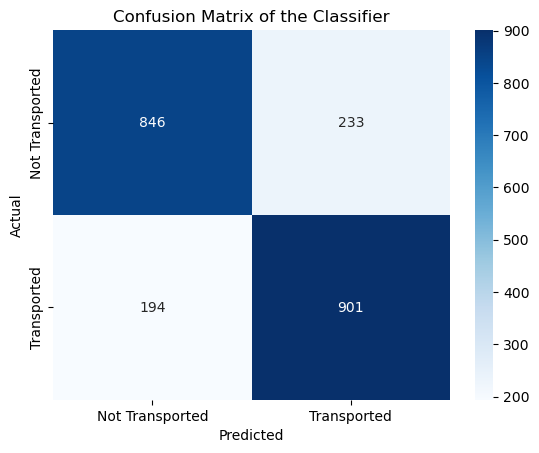

In [20]:
# calling the visual_cm function
visual_cm(true_y = y_train_2,
          pred_y = ugbc_valid_pred,
          labels = ['Not Transported', 'Transported'])

<br><br>
<h3>The Confusion Matrix</h3><br>
The confusion matrix reads as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
(correct) 846      |  (incorrect)233
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
(incorrect)194     |  (correct)901
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                                 |
 PREDICTED:Will be not transported (Transport=0) |  PREDICTED: Will be transported (Transport=1)
  ACTUAL: Will not be transported (Transport=0)  |  ACTUAL:    Will not be transported  (Transport=0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
PREDICTED: Will not be transported  (Transport=0)|  PREDICTED: Will be transported (Transport=1)
  ACTUAL:  Will be transported (Transport=1)     |      ACTUAL:    Will be transported (Transport=1)
                                                 |  
~~~
<br><br>
HyperTuned Gradient Boosting Classifier provides powerful insights. It has a higher training and testing scores and the gap is minimal. This minimizes the effects of data discrepancies and gives a better understanding of the model features with a good prediction. The trained Gradient Boosting Classifier has obtained an accuracy of 84.25% on the training set and an accuracy of 80.36% on the testing set. The gap between the training and testing accuracy (train-test gap) is 3.89%, which displays that the model is not overfitting or underfitting.<br>
<br>
From the confusion matrix, the model correctly predicted 901 positive cases and 846 negative cases, but misclassified 233 negative cases as positive (false positives) and 194 positive cases as negative (false negatives). Overall, while the model's performance is not perfect, it is still able to classify the majority of the cases accurately with CryoSleep_TRUE feature having the huge impact. The 194 false negative cases predicts that a passenger will not be transported but the passenger will be transported. This is bad as a prediction and it should be minimized to reduce the number of transported passengers.
<br>
<br>

In [21]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train_1.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Transported_Importance.png')

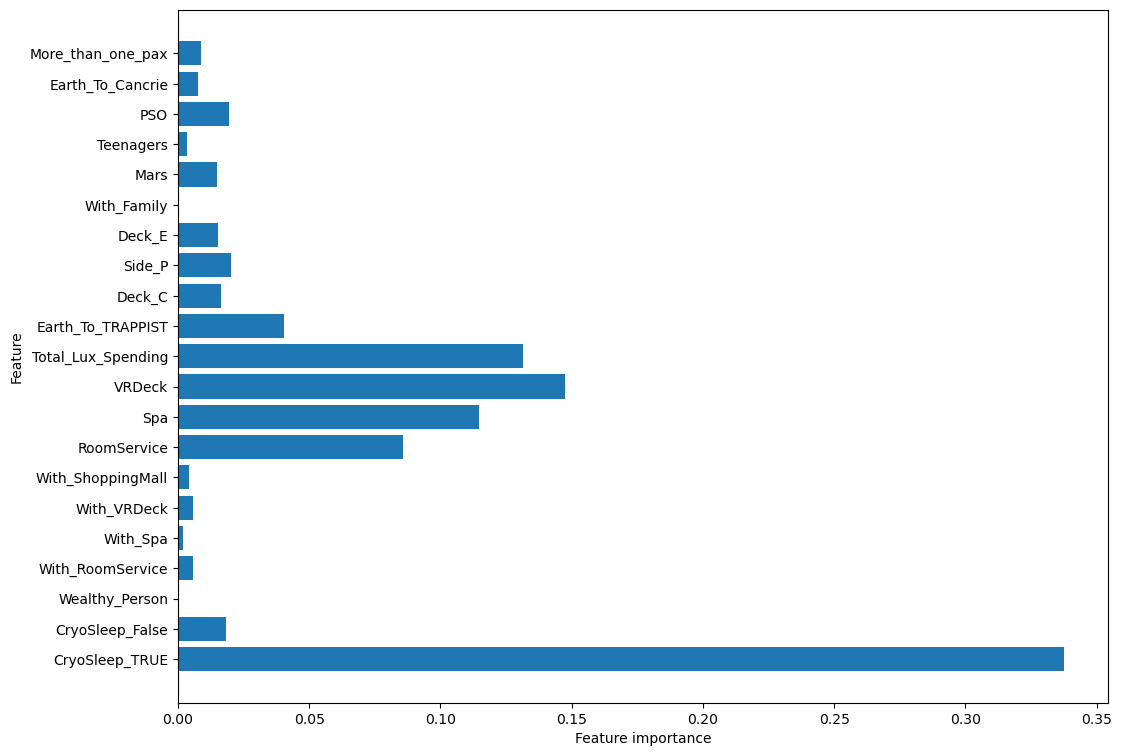

In [22]:
# plotting feature importance
plot_feature_importances(ugbc,
                         train = x_train_1,
                         export = False)

## <u>Observations and Actionable Insights</u>

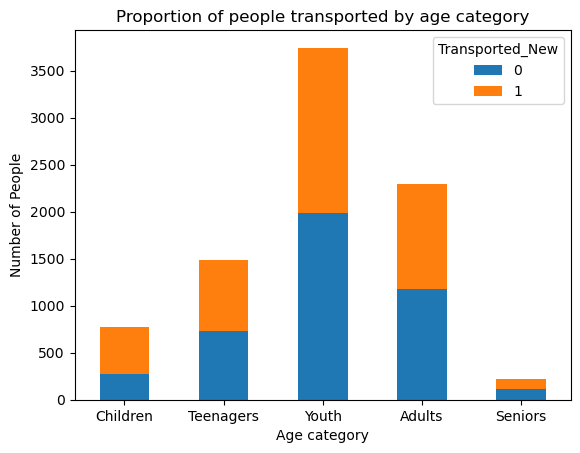

Text(0, 0.5, 'NUMBER OF TRANSPORTED')

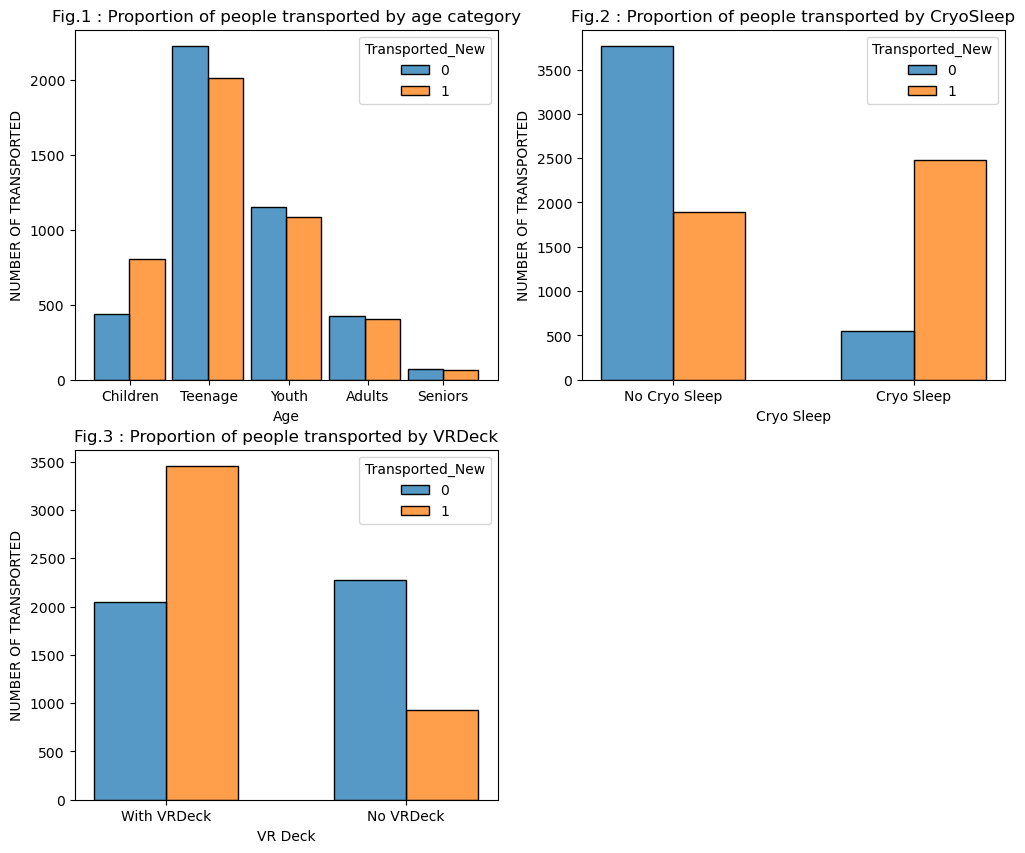

In [24]:
# Define the age categories
age_categories = ['Children','Teenagers', 'Youth', 'Adults', 'Seniors']

# Create a new column with the age category for each passenger
titanic_df['Age_Category'] = pd.cut(titanic_df['Age'], bins=[0, 13, 20, 35, 60, 150], labels=age_categories)
# Group the data by age category and transported status
grouped_data = titanic_df[ titanic_df['set']   == 'Training' ].groupby(['Age_Category', 'Transported_New']).size().reset_index(name='Count')
# grouped_data = grouped_data[ grouped_data['Transported_New']   == 1 ]
# Pivot the data to have age categories as rows and transported status as columns
pivot_data = grouped_data.pivot(index='Age_Category', columns='Transported_New', values='Count')

# Create a stacked bar plot
pivot_data.plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Proportion of people transported by age category')
plt.xticks(rotation=0)
plt.xlabel('Age category')
plt.ylabel('Number of People')

# Show the plot
plt.show()

fig, axe = plt.subplots(figsize = (12, 10))
# plt.subplot(3,2,1)
# sns.histplot(data=titanic_df, x='Age', hue='Transported_New', multiple="dodge", bins =10, shrink=.8)
# plt.xlabel(xlabel = 'AGE')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# plt.subplot(3,2,2)
# sns.histplot(data=titanic_df, x='Deck', hue='Transported_New', multiple="dodge", shrink=.8)
# plt.xlabel(xlabel = 'DECK')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# plt.subplot(3,2,3)
# sns.histplot(data=titanic_df, x='HomePlanet', hue='Transported_New', multiple="dodge", shrink=.8)
# plt.xlabel(xlabel = 'HOME PLANET')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

plt.subplot(2,2,1)
sns.histplot(data= titanic_df[ titanic_df['set'] == 'Training' ], x='Age', shrink=.9, multiple="dodge", bins=5,hue='Transported_New')
plt.xticks([8, 24, 40, 56, 71], ["Children", "Teenage", "Youth", "Adults", "Seniors"])
plt.title('Fig.1 : Proportion of people transported by age category')
plt.xlabel(xlabel = 'Age')
plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

plt.subplot(2,2,2)
sns.histplot(data= titanic_df[ titanic_df['set'] == 'Training' ], x='CryoSleep_TRUE', shrink=.6, multiple="dodge", bins=2, hue='Transported_New')
plt.xticks([0.25,0.75], ["No Cryo Sleep", "Cryo Sleep"])
plt.title('Fig.2 : Proportion of people transported by CryoSleep')
plt.xlabel(xlabel = 'Cryo Sleep')
plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# plt.subplot(3,2,5)
# sns.histplot(data=titanic_df, x='VRDeck', shrink=.6, hue='Transported_New')
# plt.xlabel(xlabel = 'VR Deck')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

plt.subplot(2,2,3)
sns.histplot(data= titanic_df[ titanic_df['set'] == 'Training' ], x='With_VRDeck', shrink=.6, multiple="dodge", bins=2, hue='Transported_New')
plt.xticks([0.25,0.75], ["With VRDeck", "No VRDeck"])
plt.title('Fig.3 : Proportion of people transported by VRDeck')
plt.xlabel(xlabel = 'VR Deck')
plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')


**Observation (Fig. 1):**<br>
On this plot, we can observe the number of people who were transported for each age category. It is important to note that children are passengers aged 0 to 13, teenagers are passengers aged 13 to 20, youth are passengers aged 20 to 35, adults are passengers aged 35 to 60, and seniors are passengers aged 60 and above.
<br>
<br>
We can observe from the histogram that almost 500 children were transported to another dimension. We also observe that around 1750 youth and 1200 adults were transported, along with approximately 100 seniors.
<br>
<br>
The fact that a high proportion of youth and adults were transported suggests that these age groups may have been more likely to be in areas of the ship that were affected by the anomaly. On the other hand, the relatively small number of seniors who were transported suggests that they may have been less affected by the anomaly.

**Insight-1: Imposing an age-limit for traveling to space** <br>

Space travel can be physically demanding and individuals who are not in good health or who have certain medical conditions may be at greater risk for complications during a spaceflight  Additionally, traveling in a spaceship also requires one to be intellectually equipped to undergo training for responding in case of emergencies (Reynolds & Neff, 2023) (Cudmore, 2018). <br>
In the event of a collision, all individuals on board would likely be subjected to a significant amount of stress, and it would be important for each individual to remain calm and focused in order to respond effectively to the situation. <br> 
Considering these factors, elderly people and children/ teenagers face increased risks due to their physical and cognitive capabilities; and they are more likely to be transported to an alternate dimension as a result of the collision. <br>
This can also be seen from the data and the chart (Fig.1), which depicts that Children are most likely to get transported. While the proportion of seniors transported is almost the same as the ones not transported, they still seem to be at risk due to the factors outlined above. 
<br>
Thus, it may be worth considering the possibility of imposing an age limit on space travel, especially in light of the potential risks and challenges associated with spaceflight, particularly for the elderly and children. It is also important to acknowledge that those in the youth and adult age groups tend to be in better physical and cognitive condition, which can help them respond appropriately in the event of an emergency during the spaceflight.
<br>

---

**Observation (Fig. 2):**<br>
On this plot, we can observe the number of people who were transported for each age category. It is important to note that children are passengers aged 0 to 13, teenagers are passengers aged 13 to 20, youth are passengers aged 20 to 35, adults are passengers aged 35 to 60, and seniors are passengers aged 60 and above.
<br>
<br>
We can observe from the histogram that almost 500 children were transported to another dimension. We also observe that around 1750 youth and 1200 adults were transported, along with approximately 100 seniors.
<br>
<br>
The fact that a high proportion of youth and adults were transported suggests that these age groups may have been more likely to be in areas of the ship that were affected by the anomaly. On the other hand, the relatively small number of seniors who were transported suggests that they may have been less affected by the anomaly.

**Insight-1: Assign special crew members to monitor cryo-sleep passengers** <br>

Cryogenic sleep is a theoretical state of suspended animation that allows preservation for extended periods without aging or requiring life support (Cryosleep: It's Not Just Science Fiction Anymore, n.d.). While sleeping during travel can have benefits such as reducing jet lag and replenishing energy levels, there are also risks such as missed transportation or destination, disorientation, and missing safety warnings in case of an emergency (Nicholson et al., 2020). <br>

Based on our findings, more passengers were transported in cryogenic sleep than those who were awake.<br>

Deep sleep can often leave people feeling disoriented and groggy upon waking, a phenomenon known as sleep inertia.<br> 
Assigning dedicated crew members to monitor the passengers in cryo-sleep can help prevent or minimize accidents' effects on them. These crew members should be responsible for waking up the passengers and guiding them to safety. <br>
Another way to prevent the effects of accidents on these people is to ensure they are securely fastened and held in a stable position..<br>

Furthermore, limiting the number of passengers in cryo-sleep can facilitate quick and effective emergency response, as fewer passengers can be easily monitored and awakened by the crew members (Hilditch & McHill, 2019). 

**Insight-3: Restricting number of passengers and time spent in the VR Deck area or replacing it with other forms of entertainment** <br>

Virtual Reality (VR) is creates a simulated environment through computer-generated scenes and objects, providing the user with a sense of presence and immersion in their surroundings. To experience VR, users wear a headset or helmet that tracks their head movements and displays corresponding images, creating the illusion of being present within a three-dimensional space. (CORPORATIVA, n.d.) <br>
Although the VR Deck can be used to develop training simulations for emergency scenarios, its primary function is to serve as a means of entertainment for extended space journeys. When fully immersed in virtual reality, individuals can lose spatial awareness and may not detect a collision occurrence, thereby increasing their susceptibility to be transported to an alternative dimension (Fagan, 2018). <br> 

These findings are consistent with the data, which is illustrated in the histogram below, indicating that the proportion of individuals transported while using the VR Deck is greater than those who were not: ""Insert visual below"" <br>

To reduce the risk associated with using the VR deck, it may be necessary to impose restrictions on the number of people allowed inside at any given time and to limit the duration of each session. Furthermore, other digital entertainment options, such as movies, TV shows, or music, that can be stored on portable devices like tablets or laptops, could be offered as substitutes. Alternatively, passengers could engage in more traditional forms of entertainment, like board games or card games, to reduce their dependence on the VR deck.

## <u>Conclusion</u>

Drawing from the preceding model analysis and insights, this information can assist in predicting the likelihood of individuals being transported to an alternate dimension in the future. By evaluating relevant characteristics of potential passengers, their transport probability can be estimated and the company can make informed decisions about resource allocation while prioritizing passengers. For instance, being in cryogenic sleep indicates a high likelihood of being transported to an alternate dimension. Space travel companies could channel more resources towards developing measures to forestall passenger transport while in cryogenic sleep. 
<br>
Moreover, these characteristics can be utilized to identify groups of passengers that are most vulnerable to get transported and implement strategies to avert such occurrences. Ultimately, by capitalizing on these features, space travel companies can enhance passenger satisfaction, safety, and the efficiency of their operations.

## <u>References</u>


1.  Chen, C. C., & Petrick, J. F. (2013). Health and Wellness Benefits of Travel Experiences: A Literature Review. Journal of Travel Research, 52(6), 709–719. https://doi.org/10.1177/0047287513496477

2. CORPORATIVA, I. (n.d.). Iberdrola. Iberdrola. https://www.iberdrola.com/innovation/virtual-reality

3. Cryosleep: It’s Not Just Science Fiction Anymore. (n.d.). Retrieved March 8, 2023, from https://www.treehugger.com/cryosleep-its-not-just-science-fiction-anymore-4863559

4. Cudmore, J. C. (2018, July 15). The Effects of Space Travel on The Body - INKspire. INKspire. https://inkspire.org/post/the-effects-of-space-travel-on-the-body/-LElpgXRkt-m0O-T_NJF

5. Fagan. (2018, March 4). Here’s what happens to your body when you’ve been in virtual reality for too long. Business Insider. Retrieved March 9, 2023, from https://www.businessinsider.com/virtual-reality-vr-side-effects-2018-3

6. Hilditch, C. J., & McHill, A. W. (2019). Sleep inertia: current insights. Nature and Science of Sleep, 11, 155. https://doi.org/10.2147/NSS.S188911

7. Hiranrusme, T., Piyaphanee, W., Kaewkungwal, J., Silachamroon, U., Leowattana, W., Chatapat, L., & Matsee, W. (2020). Risk perception of health problems among travelers visiting a travel clinic in Bangkok, Thailand. Tropical Diseases, Travel Medicine and Vaccines, 6(1), 1–11. https://doi.org/10.1186/S40794-020-00108-0/FIGURES/5

8. Maddux, W. W., Adam, H., & Galinsky, A. D. (2010). When in rome . . . learn why the romans do what they do: How multicultural learning experiences facilitate creativity. Personality and Social Psychology Bulletin, 36(6), 731–741. https://doi.org/10.1177/0146167210367786

9. Nicholson, M., Chan, N., Bhagirath, V., & Ginsberg, J. (2020). Prevention of Venous Thromboembolism in 2020 and Beyond. Journal of Clinical Medicine, 9(8), 1–27. https://doi.org/10.3390/JCM9082467

10. Pisutsan, P., Soonthornworasiri, N., Matsee, W., Phumratanaprapin, W., Punrin, S., Leowattana, W., Mansanguan, C., Leshem, E., & Piyaphanee, W. (2019). Incidence of health problems in travelers to Southeast Asia: A prospective cohort study. Journal of Travel Medicine, 26(7). https://doi.org/10.1093/JTM/TAZ045

11. Reynolds, G., & Neff, W. (2023, January 12). The many, many reasons space travel is bad for the human body. Washington Post. Retrieved March 9, 2023, from https://www.washingtonpost.com/technology/interactive/2023/how-space-affects-human-body/

12. Vada, S., Prentice, C., Scott, N., & Hsiao, A. (2020). Positive psychology and tourist well-being: A systematic literature review. Tourism Management Perspectives, 33. https://doi.org/10.1016/j.tmp.2019.100631

13. White, F. (1998). The overview effect : space exploration and human evolution. 314

<br>